In [12]:
import os
import numpy as np
from astropy.io import fits
from linetools.spectra.xspectrum1d import XSpectrum1D

# Matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["font.family"] = "serif"
rcParams["font.serif"] = "Times New Roman"
%matplotlib notebook
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = [r'\usepackage{amsmath} \usepackage{bm} \usepackage{physics}']
%config InlineBackend.figure_format = 'retina' # For high quality figures

In [2]:
# Load the data and headers
arc_fname   = os.path.join('..', 'arcs.fits')
solar_fname = os.path.join('..', 'solar_spectrum.fits')

arc_spec, arc_header = fits.getdata(arc_fname, header=True)
solar_spec, solar_header = fits.getdata(solar_fname, header=True)

In [3]:
arc_header

SIMPLE  =                    T / NORMAL FITS IMAGE                              
BITPIX  =                   16 / DATA PRECISION                                 
NAXIS   =                    2 / NUMBER OF IMAGE DIMENSIONS                     
NAXIS1  =                 2112 / NUMBER OF COLUMNS                              
NAXIS2  =                  325 / NUMBER OF ROWS                                 
CRVAL1U =                    0 / COLUMN ORIGIN                                  
CRVAL2U =                 1249 / ROW ORIGIN                                     
CDELT1U =                    1 / COLUMN CHANGE PER PIXEL                        
CDELT2U =                   -1 / ROW CHANGE PER PIXEL                           
OBSNUM  =                 1014 / OBSERVATION NUMBER                             
IDNUM   =                    3 / IMAGE ID                                       
UGEOM   =                    6 / UCAM READOUT GEOMETRY                          
DGEOM   =                   

## Visually inspecting the arc lamp spectrum, it's the Blue lamp from Kast:
From: https://mthamilton.ucolick.org/techdocs/instruments/kast/images/Kastblue600HeHgCd.jpg

GRISM_N = 600/4310

The arcs.fits header tells that there are 4 line lamps turned on:
    - LAMP G: Hg-Cd
    - LAMP F: He
    - Lamp D: Spare_Ar
    - Lamp J: Ne
    
    
Have identified 5 lines to fit with wavelengths (in Angstroms):
    - HgI: 4046.56
    - HgI: 4358.33
    - CdI: 4799.92
    - CdI: 5085.82
    - HgI: 5460.74

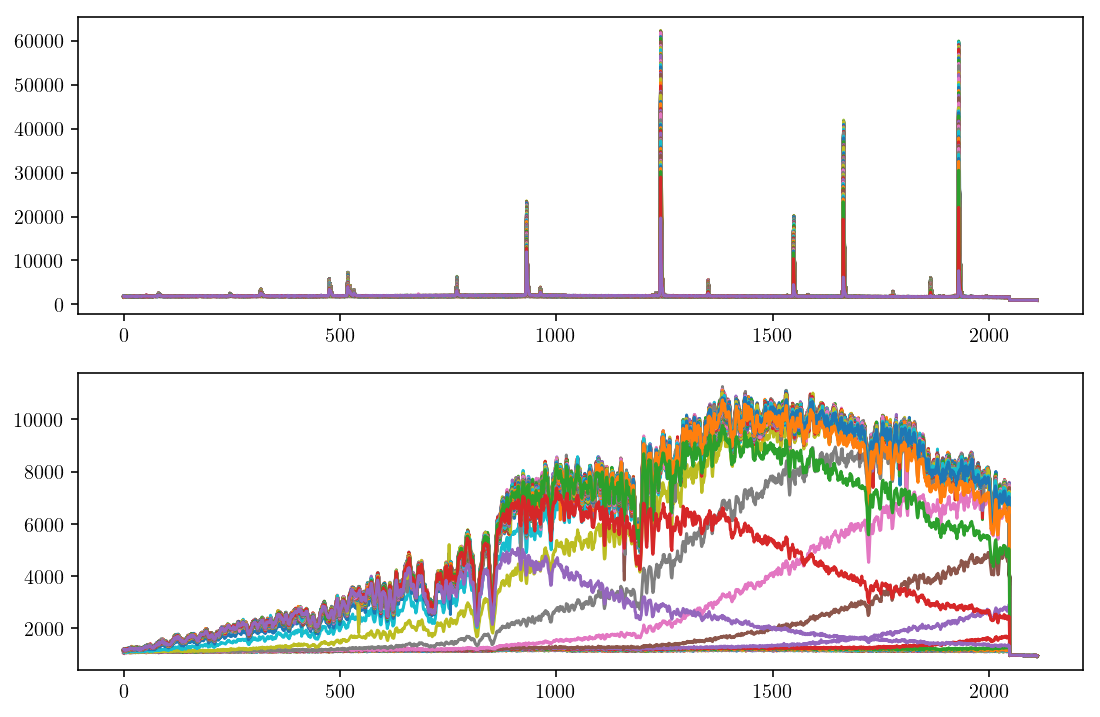

In [4]:
fig, axes = plt.subplots(nrows=2, figsize=(9,6))
ax0, ax1 = axes.flatten()
ax0.plot(arc_spec.T)
ax1.plot(solar_spec.T)
plt.show()

## Now do a polynomial fit to convert pixels to wavelengths

(Measured pixel values corresponding to the calibration lamp lines using DS9)

### Format the fitting data

In [4]:
fit_data = np.array([[522., 3650.15], 
                     [772., 3888.65], 
                     [935., 4046.56], 
                     [1243., 4358.33], 
                     [1551., 4678.16], 
                     [1667., 4799.92], 
                     [1932., 5085.82]])
x = fit_data[:, 0]
y = fit_data[:, 1]

### Fit a polynomial

In [5]:
deg = 3
z = np.polyfit(x, y, deg)
p = np.poly1d(z)

### Plot the results

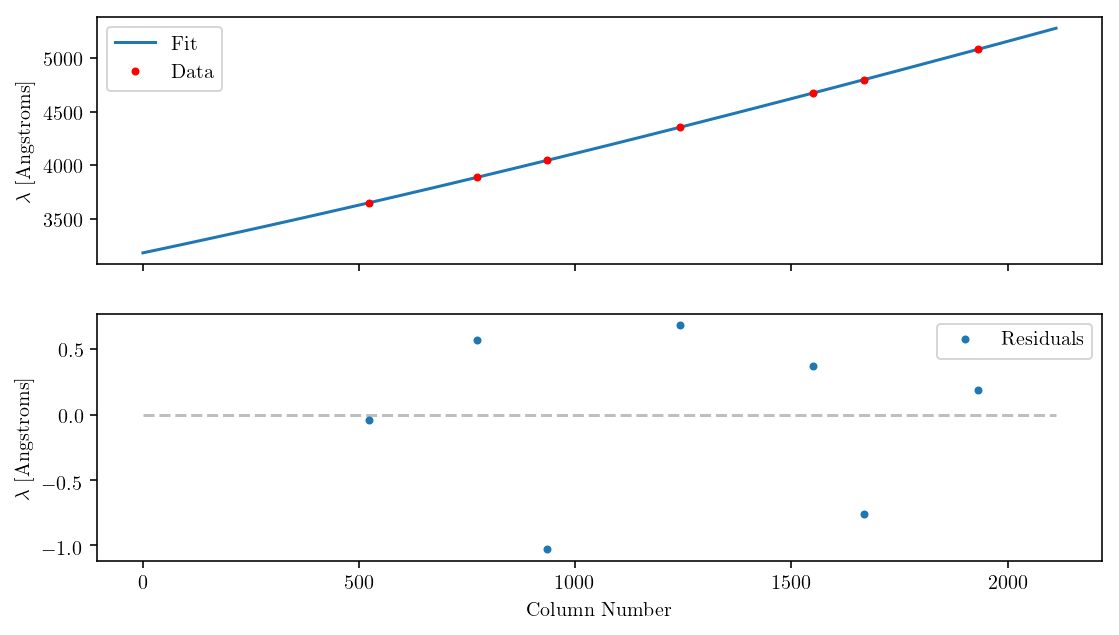

In [65]:
fig, axes = plt.subplots(nrows=2, figsize=(9,5), sharex=True)
ax0, ax1 = axes.flatten()
x_grid = np.linspace(0, arc_spec.shape[1], 100) # Plot over all column numbers to check extrapolation

ax0.plot(x_grid, p(x_grid), label='Fit')
ax0.plot(x, y, '.r', label='Data')
ax1.plot(x_grid, np.zeros(x_grid.shape[0]), '--', color='gray', alpha=0.5)
ax1.plot(x, y - p(x), '.', label='Residuals')

ax0.legend()
ax1.legend()
ax0.set_ylabel(r'$\lambda$ [Angstroms]')
ax1.set_ylabel(r'$\lambda$ [Angstroms]')
ax1.set_xlabel('Column Number')

plt.show()

## Now calibrate the solar spectrum using the polynomial object we just fit

### First project the spectrum images down by row

In [6]:
col_num  = np.arange(arc_spec.shape[1])
arc_fl   = np.median(arc_spec, axis=0)
solar_fl = np.median(solar_spec, axis=0)

### Calibrate the 1d spectra (transform from column number to wavelength)

In [7]:
wl = p(col_num)

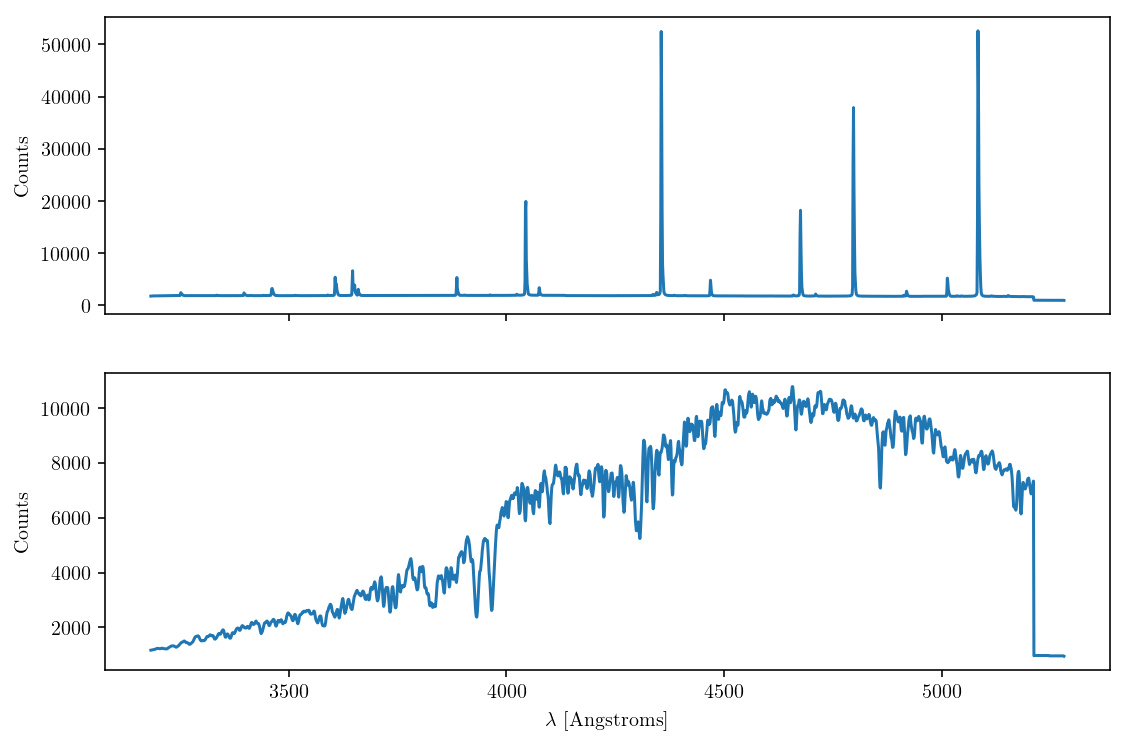

In [8]:
fig, axes = plt.subplots(nrows=2, figsize=(9,6), sharex=True)

ax0, ax1 = axes.flatten()
ax0.plot(wl, arc_fl)
ax1.plot(wl, solar_fl)

ax1.set_xlabel(r'$\lambda$ [Angstroms]')

ax0.set_ylabel('Counts')
ax1.set_ylabel('Counts')

plt.show()

Notice Ca H and K lines near 3968 and 3933 A respectively.

See: https://en.wikipedia.org/wiki/Fraunhofer_lines

In [15]:
x_spec = XSpectrum1D.from_tuple((wl, solar_fl))
x_spec.plot(xspec=True)

/Users/josephmurphy/anaconda/envs/astr_257/lib/python3.7/site-packages/linetools/spectra/xspectrum1d.py:355: UserWarning: This spectrum does not contain an input error array
  warnings.warn("This spectrum does not contain an input error array")


read_sets: Using set file -- 
  /Users/josephmurphy/anaconda/envs/astr_257/lib/python3.7/site-packages/linetools/lists/sets/llist_v1.2.ascii


/Users/josephmurphy/anaconda/envs/astr_257/lib/python3.7/site-packages/linetools/lists/linelist.py:379: UserWarning: Not implemented: will not set relative strength for LineList: Galaxy.
  warnings.warn('Not implemented: will not set relative strength for LineList: {}.'.format(self.list))
/Users/josephmurphy/anaconda/envs/astr_257/lib/python3.7/site-packages/linetools/spectra/xspectrum1d.py:355: UserWarning: This spectrum does not contain an input error array
  warnings.warn("This spectrum does not contain an input error array")


button=1, x=312.000000, y=1128.000000, xdata=3274.166290, ydata=15150.6
Out of bounds


/Users/josephmurphy/anaconda/envs/astr_257/lib/python3.7/site-packages/linetools/spectra/xspectrum1d.py:355: UserWarning: This spectrum does not contain an input error array
  warnings.warn("This spectrum does not contain an input error array")
/Users/josephmurphy/anaconda/envs/astr_257/lib/python3.7/site-packages/linetools/spectra/xspectrum1d.py:355: UserWarning: This spectrum does not contain an input error array
  warnings.warn("This spectrum does not contain an input error array")
/Users/josephmurphy/anaconda/envs/astr_257/lib/python3.7/site-packages/linetools/spectra/xspectrum1d.py:355: UserWarning: This spectrum does not contain an input error array
  warnings.warn("This spectrum does not contain an input error array")


Navigate: You entered the ] key out of bounds


/Users/josephmurphy/anaconda/envs/astr_257/lib/python3.7/site-packages/linetools/spectra/xspectrum1d.py:355: UserWarning: This spectrum does not contain an input error array
  warnings.warn("This spectrum does not contain an input error array")
/Users/josephmurphy/anaconda/envs/astr_257/lib/python3.7/site-packages/linetools/spectra/xspectrum1d.py:355: UserWarning: This spectrum does not contain an input error array
  warnings.warn("This spectrum does not contain an input error array")
/Users/josephmurphy/anaconda/envs/astr_257/lib/python3.7/site-packages/linetools/spectra/xspectrum1d.py:355: UserWarning: This spectrum does not contain an input error array
  warnings.warn("This spectrum does not contain an input error array")
